# B2. Proba voluntaria: diferenciando materias de modalidad		


En este apartado se presenta un análisis de los resultados obtenidos a partir del conjunto completo de calificaciones correspondientes a todos los estudiantes pero diferenciando las materias voluntarias.

## 1. Obtención de los datos

Cargamos los datos desde un archivo Excel y se informa si tuvo éxito o si ocurrió algún problema (como no encontrar el archivo).

In [45]:
import pandas as pd
df = pd.read_excel('proba_voluntaria.xlsx')
display(df)

,Número\nInscrición,DNI,Apelidos,Nome,Cod. Mat. Opt. 1,Mat. Opt. 1,Cualif. Mat Opt. 1,Apto 1,Cod. Mat. Opt. 2,Mat. Opt. 2,Cualif. Mat Opt. 2,Apto 2,Cod. Mat. Opt. 3,Mat. Opt. 3,Cualif. Mat Opt. 3,Apto 3
0,4449-001,35641492W,ÁLVAREZ GRAÑA,ERIC,62,Francés,2.5,Non apto,81.0,Coro e Técnica Vocal II,9,Apto,NaN,NaN,NaN,NaN
1,4449-002,77681389Q,AMMI GUAROUACH,ZARA,33,Historia da Arte,3.25,Non apta,35.0,Xeografía,Non presentada,NaN,62.0,Francés,5,Apta
2,4449-003,77548365R,ARIAS PORTELA,JOSÉ,23,Física,Non presentado,NaN,26.0,Tecnoloxía e Enxeñaría II,10,Apto,40.0,Matemáticas Ap. ás CCSS,6.25,Apto
3,4449-005,77479961E,CABO SENRA,MARTÍN,23,Física,3.25,Non apto,26.0,Tecnoloxía e Enxeñaría II,7.75,Apto,40.0,Matemáticas Ap. ás CCSS,7.5,Apto
4,4449-006,53862596T,CALVIÑO ALMAZÁN,PATRICIA,21,Bioloxía,10,Apta,24.0,Química,8.5,Apta,NaN,NaN,NaN,NaN
5,4449-007,54383404L,CALVIÑO MUÑIZ,ERIKA,21,Bioloxía,5.5,Apta,40.0,Matemáticas Ap. ás CCSS,1.25,Non apta,NaN,NaN,NaN,NaN
6,4449-008,54320110K,CALVO DURÁN,ADÁN,23,Física,5.5,Apto,26.0,Tecnoloxía e Enxeñaría II,7.5,Apto,NaN,NaN,NaN,NaN
7,4449-009,53863241R,CASADO MIRANDA,UXÍA,62,Francés,5.5,Apta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4449-010,49671266Y,CASAL SÁNCHEZ,NURIA,20,Matemáticas II,Non presentada,NaN,21.0,Bioloxía,5.75,Apta,NaN,NaN,NaN,NaN
9,4449-011,77478979Y,CASTRO CANCELA,LAURA,21,Bioloxía,1.5,Non apta,24.0,Química,0.5,Non apta,40.0,Matemáticas Ap. ás CCSS,1,Non apta


## 2. Preparación de los datos

### 2.1. Identificar materias únicas y nº estudiantes calificados

Obtener una lista de todas las materias únicas presentes en el conjunto de datos combinado.


In [46]:
all_materias = pd.concat([df['Mat. Opt. 1'], df['Mat. Opt. 2'], df['Mat. Opt. 3']]).dropna().unique().tolist()
all_materias.sort() # Sort the list alphabetically
#print("Listado de todas las materias en las tres columnas (orden alfabético):")
#print(all_materias)

In [47]:
import numpy as np
import pandas as pd

# Combinar las columnas relevantes en un solo DataFrame para el análisis
df_limpio = df.melt(id_vars=['Número\nInscrición'], value_vars=['Cualif. Mat Opt. 1', 'Cualif. Mat Opt. 2', 'Cualif. Mat Opt. 3'], var_name='Materia_Opt', value_name='Calificación')

# Mapear los nombres de las materias desde el df original basándose en la columna 'Materia_Opt' y 'Número\nInscrición'
def obtener_nombre_materia(fila):
    if fila['Materia_Opt'] == 'Cualif. Mat Opt. 1':
        return df.loc[df['Número\nInscrición'] == fila['Número\nInscrición'], 'Mat. Opt. 1'].iloc[0]
    elif fila['Materia_Opt'] == 'Cualif. Mat Opt. 2':
        return df.loc[df['Número\nInscrición'] == fila['Número\nInscrición'], 'Mat. Opt. 2'].iloc[0]
    elif fila['Materia_Opt'] == 'Cualif. Mat Opt. 3':
        return df.loc[df['Número\nInscrición'] == fila['Número\nInscrición'], 'Mat. Opt. 3'].iloc[0]
    return None

df_limpio['Materia'] = df_limpio.apply(obtener_nombre_materia, axis=1)

# Seleccionar y reordenar columnas
df_limpio = df_limpio[['Número\nInscrición', 'Materia', 'Calificación']]

# Reemplazar "Non presentado" con NaN antes de convertir a numérico
df_limpio['Calificación'] = df_limpio['Calificación'].replace('Non presentado', np.nan)


# Convertir 'Calificación' a numérico, forzando errores
df_limpio['Calificación'] = pd.to_numeric(df_limpio['Calificación'], errors='coerce')

# Eliminar filas donde 'Calificación' es NaN (incluyendo las que eran 'Non presentado') o 'Materia' es NaN
df_limpio.dropna(subset=['Calificación', 'Materia'], inplace=True)


## 3. Análisis estadítico

In [48]:
# Generar el resumen estadístico para las calificaciones por materia
resumen_por_materia = df_limpio.groupby('Materia')['Calificación'].describe().T

# Mostrar el resumen estadístico
print("Resumen estadístico de calificaciones por materia:")
display(resumen_por_materia)

Resumen estadístico de calificaciones por materia:


Materia,Bioloxía,Ciencias Xerais,Coro e Técnica Vocal II,Deseño,Empresa e D.M. Negocio,Francés,Fundamentos Artísticos,Física,Historia da Arte,Inglés,Latín II,Matemáticas Ap. ás CCSS,Matemáticas II,Química,Tecnoloxía e Enxeñaría II,Xeografía
count,19.000000,1.0,2.0,6.000000,8.000000,6.000000,9.000000,4.000000,2.000000,1.00,1.0,13.000000,4.000000,14.000000,4.000000,4.000000
mean,5.947368,6.5,9.0,4.250000,6.312500,4.708333,5.833333,4.812500,4.125000,6.25,6.0,4.019231,4.687500,5.839286,7.937500,6.375000
std,2.598850,NaN,0.0,1.635543,3.242436,1.791764,1.192424,1.048312,1.237437,NaN,NaN,2.232482,2.383756,2.544993,1.477258,1.361678
min,1.500000,6.5,9.0,2.500000,0.000000,2.500000,4.000000,3.250000,3.250000,6.25,6.0,1.000000,1.500000,0.250000,6.500000,5.250000
25%,4.625000,6.5,9.0,2.750000,4.875000,3.125000,5.000000,4.750000,3.687500,6.25,6.0,1.750000,3.562500,5.312500,7.250000,5.437500
50%,6.250000,6.5,9.0,4.250000,6.500000,5.250000,5.750000,5.250000,4.125000,6.25,6.0,4.000000,5.250000,6.625000,7.625000,6.000000
75%,7.375000,6.5,9.0,5.750000,9.125000,6.062500,6.500000,5.312500,4.562500,6.25,6.0,6.250000,6.375000,7.500000,8.312500,6.937500
max,10.000000,6.5,9.0,6.000000,9.500000,6.500000,8.000000,5.500000,5.000000,6.25,6.0,7.500000,6.750000,8.500000,10.000000,8.250000


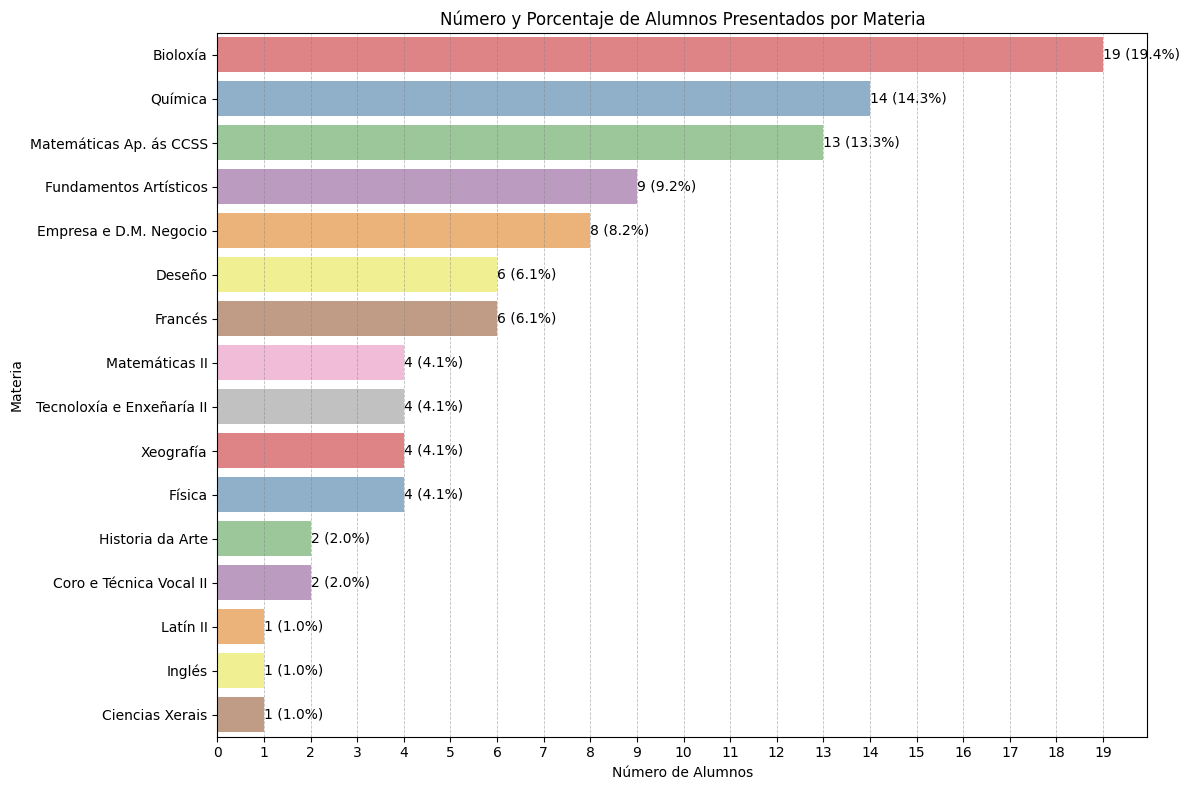

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 8))

# Usar seaborn.barplot para colorear cada barra
# Obtener los conteos y restablecer el índice para usar columnas con seaborn
counts_df = df_limpio['Materia'].value_counts().reset_index()
counts_df.columns = ['Materia', 'Número de Alumnos'] # Renombrar columnas para mayor claridad

# Calcular el total de alumnos presentados
total_alumnos = counts_df['Número de Alumnos'].sum()

# Calcular el porcentaje de alumnos por materia
counts_df['Porcentaje'] = (counts_df['Número de Alumnos'] / total_alumnos) * 100

# Ordenar el dataframe por el número de alumnos para la visualización ordenada
counts_df_sorted = counts_df.sort_values(by='Número de Alumnos', ascending=False)

# Crear el gráfico de barras con diferentes colores por materia y ordenado por conteo
ax = sns.barplot(x='Número de Alumnos', y='Materia', hue='Materia', data=counts_df_sorted, palette='Set1', alpha=0.6, dodge=False) # Usando la paleta Set1, usando datos ordenados

plt.title('Número y Porcentaje de Alumnos Presentados por Materia')
plt.xlabel('Número de Alumnos')
plt.ylabel('Materia')

# Establecer los ticks del eje x a números enteros
plt.xticks(np.arange(0, counts_df['Número de Alumnos'].max() + 1, 1))

# Añadir líneas verticales en cada número entero del eje x para mejor referencia visual
for x_value in np.arange(1, counts_df['Número de Alumnos'].max() + 1, 1):
    ax.axvline(x=x_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5)

# Añadir las etiquetas de número de alumnos y porcentaje al final de cada barra
for index, row in counts_df_sorted.iterrows():
    ax.text(row['Número de Alumnos'], index, f'{row["Número de Alumnos"]} ({row["Porcentaje"]:.1f}%)', color='black', ha="left", va="center")


plt.tight_layout()
plt.show()

## 4. Visualización de los datos

### 4.1. Histogramas por materias voluntarias


Iterar sobre cada materia única y crear un histograma de las calificaciones correspondientes.


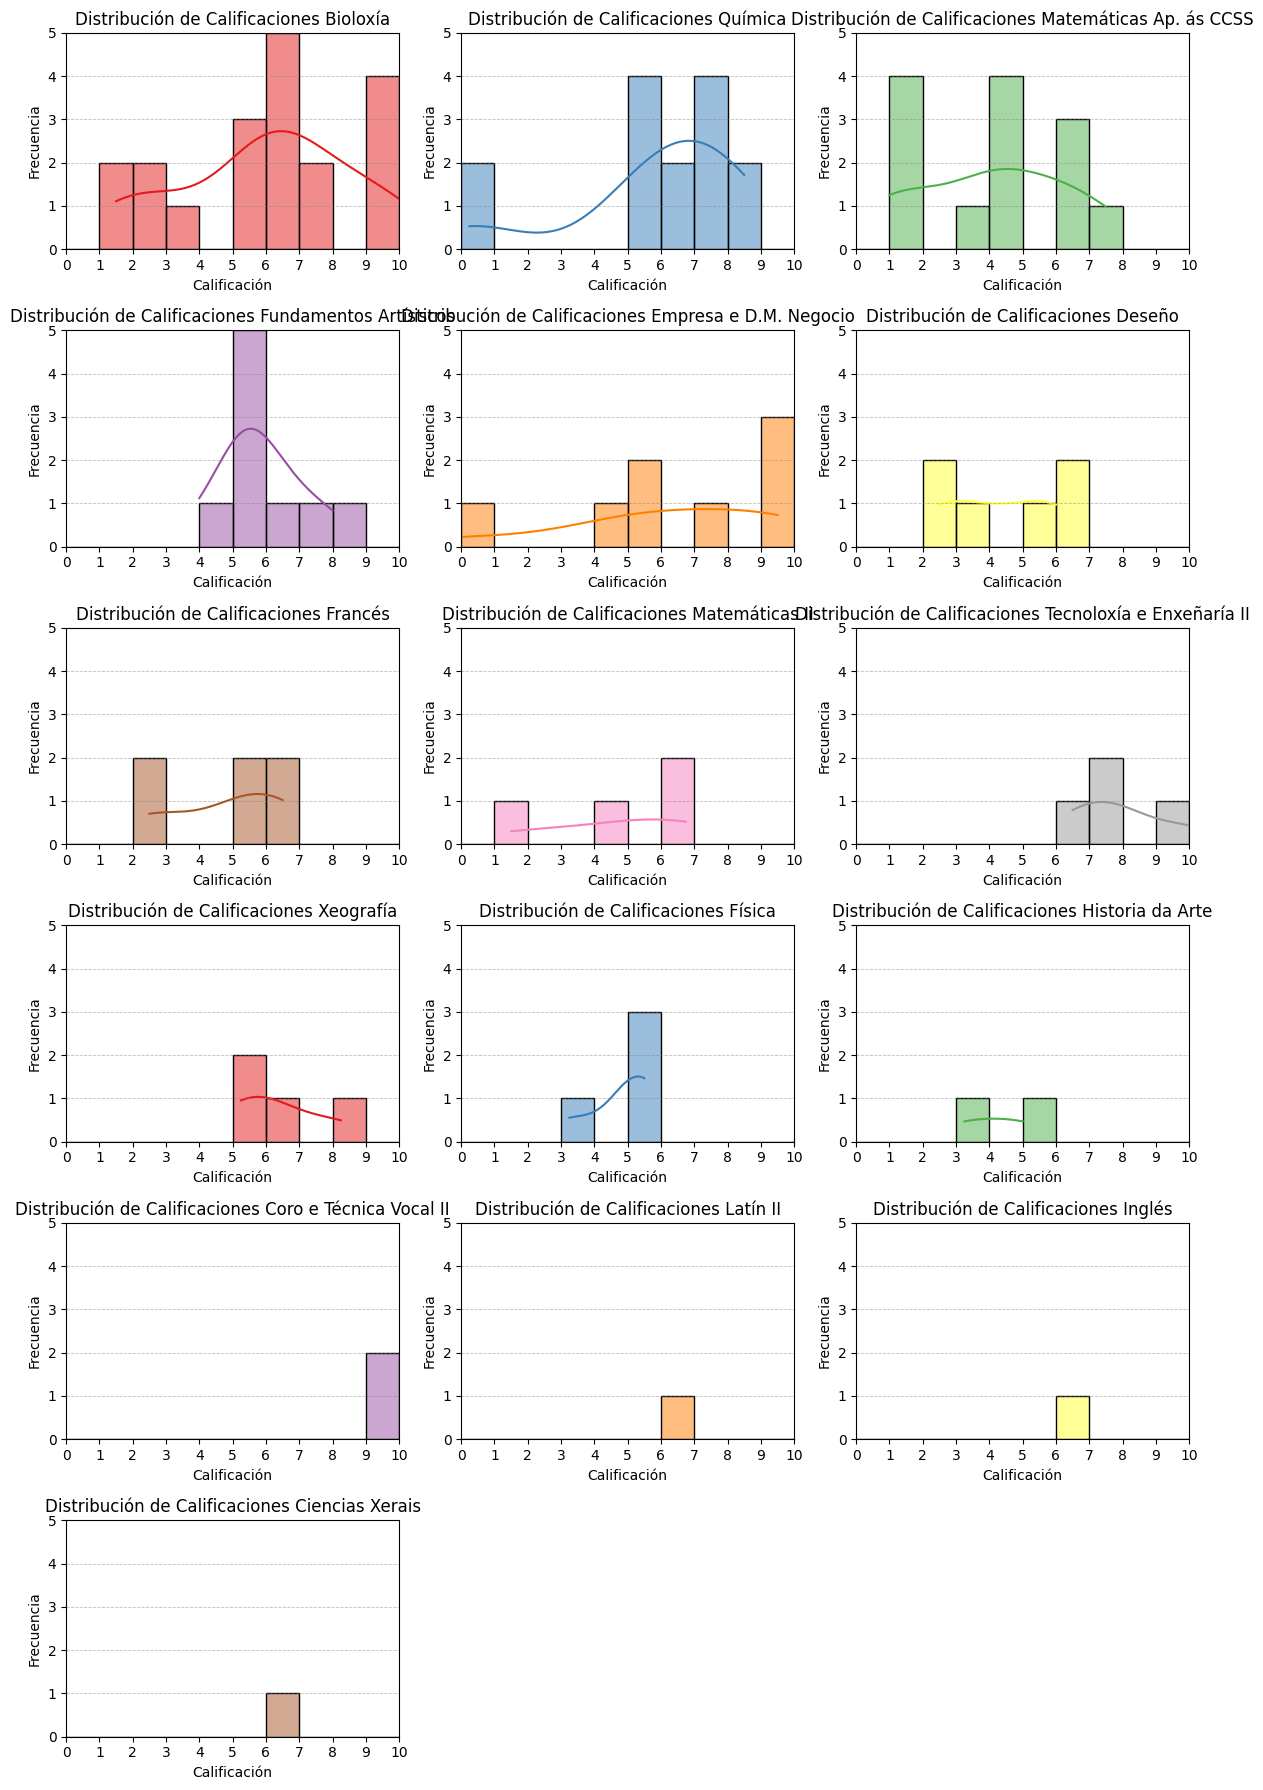

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obtener la lista de materias únicas del dataframe counts_df
materias_unicas = counts_df['Materia'].unique().tolist()

# Definir una paleta de colores para los histogramas
colors = sns.color_palette('Set1', len(materias_unicas))

# Calcular el número de filas y columnas para la cuadrícula de histogramas
n_materias = len(materias_unicas)
n_cols = 3
n_rows = (n_materias + n_cols - 1) // n_cols

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Definir los bins consistentes para todos los histogramas (de 0 a 10 con pasos de 1)
consistent_bins = np.arange(0, 11, 1)

# Iterar sobre cada materia para crear un histograma
for i, materia in enumerate(materias_unicas):
    # Filtrar el dataframe para la materia actual
    df_materia = df_limpio[df_limpio['Materia'] == materia].copy()
    # Verificar si hay datos para la materia
    if not df_materia.empty:
        # Seleccionar el eje actual para el subplot
        ax = axes[i]
        # Crear el histograma de calificaciones con KDE
        sns.histplot(df_materia['Calificación'], bins=consistent_bins, kde=True, color=colors[i], ax=ax)
        # Establecer título y etiquetas de los ejes
        ax.set_title(f'Distribución de Calificaciones {materia}')
        ax.set_xlabel('Calificación')
        ax.set_ylabel('Frecuencia')
        # Establecer los límites del eje x y los ticks
        ax.set_xlim(0, 10)
        ax.set_xticks(np.arange(0, 11, 1))
        # Establecer los límites del eje y y los ticks para que sean enteros
        ax.set_ylim(0, 5) # Ajustar si es necesario según la frecuencia máxima esperada
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

        # Obtener los límites actuales del eje y y los ticks
        y_min, y_max = ax.get_ylim()
        y_ticks = ax.get_yticks()

        # Añadir líneas horizontales en cada tick del eje y para mejor referencia visual
        for y_value in y_ticks:
            if y_value >= y_min and y_value <= y_max:
                 ax.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5)

# Eliminar los ejes vacíos si el número de materias es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar la superposición de títulos y etiquetas
plt.tight_layout()
# Mostrar los gráficos
plt.show()

### 4.2. Box plot por materias voluntarias

Iterar sobre cada materia única y crear un box plot de las calificaciones correspondientes.

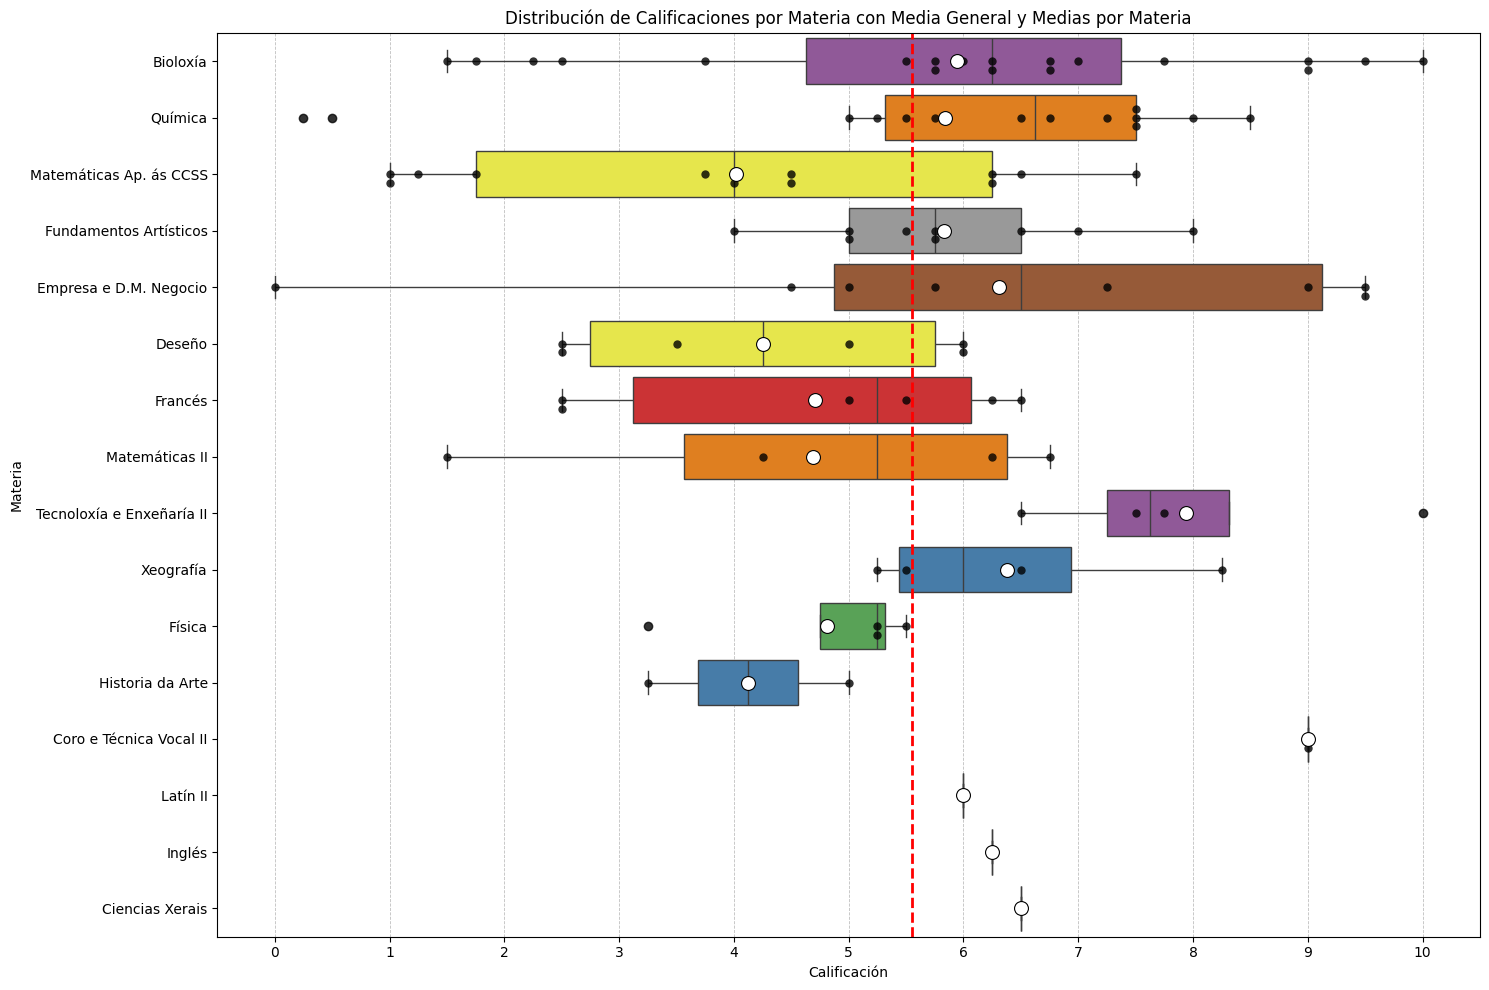

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pandas as pd

# Calcular la media general de calificaciones
overall_mean_qualification = df_limpio['Calificación'].mean()

# Calcular la media de calificaciones por materia
mean_qualifications_by_subject = df_limpio.groupby('Materia')['Calificación'].mean().reset_index()

# Asegurarse de que counts_df_sorted esté disponible de pasos anteriores
# Si no está disponible, calcularlo (esto puede ser redundante si se ejecutan las celdas en orden)
if 'counts_df_sorted' not in locals() or counts_df_sorted is None:
    counts_df = df_limpio['Materia'].value_counts().reset_index()
    counts_df.columns = ['Materia', 'Número de Alumnos']
    counts_df_sorted = counts_df.sort_values(by='Número de Alumnos', ascending=False)

# Definir el orden de las materias basado en el número de alumnos presentados
subject_order = counts_df_sorted['Materia'].tolist()

# Ordenar el DataFrame de medias por materia según el orden definido
mean_qualifications_by_subject_ordered = mean_qualifications_by_subject.set_index('Materia').loc[subject_order].reset_index()

# Definir la paleta de colores para los boxplots
subject_palette = sns.color_palette('Set1', len(subject_order))

# Crear la figura y los ejes para el boxplot
plt.figure(figsize=(15, 10))
# Crear el boxplot de calificaciones por materia, ordenado y con colores (Horizontal)
ax = sns.boxplot(data=df_limpio, x='Calificación', y='Materia', hue='Materia',palette='Set1', order=subject_order)
# Establecer título y etiquetas de los ejes
plt.title('Distribución de Calificaciones por Materia con Media General y Medias por Materia')
plt.xlabel('Calificación')
plt.ylabel('Materia')
# Establecer los límites del eje x y los ticks (invertidos para horizontal)
plt.xlim(-0.5, 10.5)
plt.xticks(np.arange(0, 11, 1))
# Ajustar el layout
plt.tight_layout()

# Añadir una línea vertical para la media general (invertida para horizontal)
mean_line = ax.axvline(overall_mean_qualification, color='red', linestyle='--', linewidth=2, label=f'Media General: {overall_mean_qualification:.2f}')

# Añadir puntos para las medias por materia en el boxplot (invertidos para horizontal)
sns.scatterplot(data=mean_qualifications_by_subject_ordered, x='Calificación', y='Materia', color='white', edgecolor='black', s=100, ax=ax, zorder=5, label='Media por Materia')

# Añadir un swarmplot para mostrar las calificaciones individuales (jittered points) (invertidos para horizontal)
sns.swarmplot(data=df_limpio, x='Calificación', y='Materia', color='black', size=6, ax=ax, alpha=0.8, order=subject_order, label='Calificación Individual')

# Añadir líneas verticales en cada número entero del eje x para mejor referencia visual (invertidas para horizontal)
for x_value in np.arange(0, 11, 1):
    ax.axvline(x=x_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5, zorder=0) # Añadir zorder para asegurar que las líneas estén detrás de los puntos

# Intentar eliminar la leyenda duplicada si existe
try:
    ax.get_legend().remove()
except:
    pass

# Mostrar el gráfico
plt.show()

## 5. Conclusiones

# 5. Conclusiones

Este estudio parte de los datos de calificaciones numéricas obtenidas en materias optativas por parte del alumnado, procesadas y visualizadas mediante histogramas y box plots. Se incluye además el número de calificaciones registradas por materia (n), lo cual es esencial para:
- Valorar la representatividad de los datos.
- Aportar solidez a las interpretaciones estadísticas.
- Detectar posibles sesgos derivados de muestras reducidas.

## 5.1. 📊 Distribución del número de calificaciones por materia

Se presenta la tabla ordenada por la columna "n (nº de calificacións)" de mayor a menor:

| Materia | n (nº de calificacións) | Porcentaje |
|---|---|---|
| Bioloxía | 19 | 18.8% |
| Química | 14 | 13.9% |
| Matemáticas Aplicadas ás CCSS | 13 | 12.9% |
| Fundamentos Artísticos | 9 | 8.9% |
| Empresa e D.M. Negocio | 8 | 7.9% |
| Francés | 6 | 5.9% |
| Deseño | 6 | 5.9% |
| Xeografía | 4 | 4.0% |
| Física | 4 | 4.0% |
| Matemáticas II | 4 | 4.0% |
| Tecnoloxía e Enxeñaría II | 4 | 4.0% |
| Historia da Arte | 2 | 2.0% |
| Coro e Técnica Vocal II | 2 | 2.0% |
| Ciencias Xerais | 1 | 1.0% |
| Inglés | 1 | 1.0% |
| Latín II | 1 | 1.0% |
| **Total** | **101** | **100%** |

Se observa una variabilidad notable no tamaño de mostra por materia. Algunhas, como Bioloxía, Química ou Matemáticas Aplicadas ás CCSS, contan con datos suficientes para conclusións razoablemente sólidas. En cambio, materias como Latín II, Inglés ou Ciencias Xerais teñen só 1 alumno/a, polo que non se poden extraer conclusións representativas.

## 5.2. 🔍 Análisis estadístico detallado por materia

### 🧪 Bioloxía (n = 19)
- **Media:** 5.95 | **Mediana:** 6.25 | **Desviación estándar:** 2.60
- **Rango:** 1.5 - 10.0
- **Distribución:** Ampla dispersión con calificaciones distribuidas principalmente entre 4-8 puntos
- **Conclusión:** Materia con rendemento medio pero gran diversidade de perfís no alumnado. La distribución muestra que la mayoría del alumnado está próximo al aprobado, pero hay casos extremos tanto de bajo como de alto rendimiento.

### 🧲 Química (n = 14)
- **Media:** 5.84 | **Mediana:** 6.63 | **Desviación estándar:** 2.54
- **Rango:** 0.25 - 8.5
- **Distribución:** Distribución bimodal con concentración en torno a 5.5-7.5 y algunos casos de suspensos muy bajos
- **Conclusión:** Materia esixente con resultados polarizados. Há alumnado que destaca pero tamén casos de rendemento moi baixo. A mediana superior á media indica que existen valores extremos baixos que afectan á media.

### 🧮 Matemáticas Aplicadas ás CCSS (n = 13)
- **Media:** 4.02 | **Mediana:** 4.0 | **Desviación estándar:** 2.23
- **Rango:** 1.0 - 7.5
- **Distribución:** Distribución relativamente uniforme con alta concentración de suspensos (por debajo de 5)
- **Conclusión:** Materia con rendemento preocupante. Máis da metade do alumnado non supera o aprobado. Necesaria revisión metodolóxica e reforzo académico.

### 🧑🎨 Fundamentos Artísticos (n = 9)
- **Media:** 5.83 | **Mediana:** 5.75 | **Desviación estándar:** 1.19
- **Rango:** 4.0 - 8.0
- **Distribución:** Distribución normal con baixa dispersión, concentrada entre 5-7 puntos
- **Conclusión:** Materia estable con rendemento medio-alto. A baixa dispersión indica homoxeneidade nos resultados, favorecendo perfís creativos.

### 🧑💼 Empresa e D.M. Negocio (n = 8)
- **Media:** 6.31 | **Mediana:** 6.5 | **Desviación estándar:** 3.24
- **Rango:** 0.0 - 9.5
- **Distribución:** Alta dispersión con casos extremos (0 e 9.5), pero mediana alta
- **Conclusión:** Materia con resultados polarizados. Hai alumnado moi motivado (notas altas) pero tamén algún caso de abandono ou desinterese total.

### 🗣️ Francés (n = 6)
- **Media:** 4.71 | **Mediana:** 5.25 | **Desviación estándar:** 1.79
- **Rango:** 2.5 - 6.5
- **Distribución:** Distribución sesgada cara a calificacións baixas, con mediana próxima ao aprobado
- **Conclusión:** Materia con rendemento irregular. A maioría do alumnado está no límite do aprobado, indicando dificultades na aprendizaxe do idioma.

### 🧑🎨 Deseño (n = 6)
- **Media:** 4.25 | **Mediana:** 4.25 | **Desviación estándar:** 1.64
- **Rango:** 2.5 - 6.0
- **Distribución:** Distribución equilibrada pero con tendencia a calificacións baixas
- **Conclusión:** Materia con rendemento baixo xeneralizado. Posible falta de axuste entre perfil do alumnado e contidos da materia.

### 🌍 Xeografía (n = 4)
- **Media:** 6.38 | **Mediana:** 6.0 | **Desviación estándar:** 1.36
- **Rango:** 5.25 - 8.25
- **Distribución:** Distribución compacta con todas as calificacións por riba do aprobado
- **Conclusión:** Materia con rendemento alto e homoxéneo. O alumnado que a elixe está ben preparado ou motivado.

### 🧲 Física (n = 4)
- **Media:** 4.81 | **Mediana:** 5.25 | **Desviación estándar:** 1.05
- **Rango:** 3.25 - 5.5
- **Distribución:** Distribución concentrada en torno ao aprobado pero con tendencia baixa
- **Conclusión:** Materia con rendemento baixo pero estable. Todas as calificacións están próximas ao aprobado, indicando dificultade xeneralizada.

### 🧮 Matemáticas II (n = 4)
- **Media:** 4.69 | **Mediana:** 5.25 | **Desviación estándar:** 2.38
- **Rango:** 1.5 - 6.75
- **Distribución:** Alta dispersión con casos extremos
- **Conclusión:** Materia con rendemento irregular. A alta dispersión indica perfís moi diversos de alumnado.

### 🧑💻 Tecnoloxía e Enxeñaría II (n = 4)
- **Media:** 7.94 | **Mediana:** 7.63 | **Desviación estándar:** 1.48
- **Rango:** 6.5 - 10.0
- **Distribución:** Distribución alta e homoxénea, sen suspensos
- **Conclusión:** Materia con rendemento excelente. O alumnado que a elixe está ben preparado e motivado.

### 🎭 Historia da Arte (n = 2)
- **Media:** 4.13 | **Mediana:** 4.13 | **Desviación estándar:** 1.24
- **Rango:** 3.25 - 5.0
- **Distribución:** Mostra insuficiente para conclusións sólidas
- **Conclusión:** Datos insuficientes. Tendencia a calificacións baixas pero sen significación estatística.

### 🎵 Coro e Técnica Vocal II (n = 2)
- **Media:** 9.0 | **Mediana:** 9.0 | **Desviación estándar:** 0.0
- **Rango:** 9.0 - 9.0
- **Distribución:** Ambos casos con calificación de 9
- **Conclusión:** Rendemento excelente pero mostra insuficiente. O alumnado que elixe esta materia está moi especializado.

### 📚 Materias con n = 1
- **Ciencias Xerais:** 6.5
- **Inglés:** 6.25
- **Latín II:** 6.0
- **Conclusión:** Datos insuficientes para análise estatística. Todas as calificacións están próximas ao aprobado.

## 5.3. 📊 Comparativa de resultados por materia

| Materia | Media | Mediana | Desv. Estándar | Rendemento |
|---------|-------|---------|----------------|-------------|
| Coro e Técnica Vocal II | 9.00 | 9.00 | 0.00 | Excelente |
| Tecnoloxía e Enxeñaría II | 7.94 | 7.63 | 1.48 | Excelente |
| Ciencias Xerais | 6.50 | 6.50 | - | Alto* |
| Xeografía | 6.38 | 6.00 | 1.36 | Alto |
| Empresa e D.M. Negocio | 6.31 | 6.50 | 3.24 | Medio-alto |
| Inglés | 6.25 | 6.25 | - | Alto* |
| Latín II | 6.00 | 6.00 | - | Alto* |
| Bioloxía | 5.95 | 6.25 | 2.60 | Medio |
| Química | 5.84 | 6.63 | 2.54 | Medio |
| Fundamentos Artísticos | 5.83 | 5.75 | 1.19 | Medio |
| Física | 4.81 | 5.25 | 1.05 | Baixo |
| Francés | 4.71 | 5.25 | 1.79 | Baixo |
| Matemáticas II | 4.69 | 5.25 | 2.38 | Baixo |
| Deseño | 4.25 | 4.25 | 1.64 | Baixo |
| Historia da Arte | 4.13 | 4.13 | 1.24 | Baixo* |
| Matemáticas Ap. ás CCSS | 4.02 | 4.00 | 2.23 | Baixo |

*Materias con mostra insuficiente (n ≤ 2)

## 5.4. 📌 Consideracións xerais

### Materias con mellor rendemento
- **Tecnoloxía e Enxeñaría II** e **Coro e Técnica Vocal II** destacan con excelentes resultados
- **Xeografía** presenta rendemento alto e homoxéneo
- O alumnado que elixe estas materias está ben preparado ou moi motivado

### Materias con rendemento preocupante
- **Matemáticas Aplicadas ás CCSS** require atención urxente (máis da metade de suspensos)
- **Deseño**, **Física**, **Francés** e **Matemáticas II** mostran rendemento baixo xeneralizado
- **Historia da Arte** presenta tendencia preocupante (aínda que con mostra pequena)

### Materias con alta dispersión
- **Empresa e D.M. Negocio** presenta maior dispersión (σ = 3.24), indicando perfís moi diversos
- **Bioloxía** e **Química** mostran dispersión significativa, requirindo atención individualizada

## 5.5. 📎 Recomendacións

### Inmediatas
1. **Reforzar o acompañamento** en Matemáticas Aplicadas ás CCSS mediante titorías específicas
2. **Revisar metodoloxía** en Física, Deseño e Francés
3. **Analizar causas** da alta dispersión en Empresa e D.M. Negocio

### A medio prazo
1. **Fomentar boas prácticas** detectadas en Tecnoloxía e Enxeñaría II e Xeografía
2. **Implementar apoio individualizado** en materias con alta dispersión
3. **Revisar criterios de acceso** ou preparación previa para materias con rendemento baixo

### De seguimento
1. **Analizar conxuntamente** co profesorado os resultados para detectar factores contextuais
2. **Manter un seguimento anual** para observar evolucións e impacto das medidas
3. **Ampliar mostras** nas materias con n baixo para ter conclusións máis sólidas

### Consideracións especiais
- As materias con n ≤ 2 requiren maior seguimento antes de extraer conclusións definitivas
- A correlación entre número de alumnos e rendemento debe ser analizada máis profundamente
- É necesario considerar o perfil específico do alumnado que elixe cada materia optativa